# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

from newsapi.newsapi_client import NewsApiClient

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!

load_dotenv()

# Set News API Key

api_key = os.getenv("NEWS_API_KEY")

newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [3]:
# Create a newsapi client
# YOUR CODE HERE!

newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

btc_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# NOTE TO SELF -> using ETH in the search erroneously brought back Ethan Allen Interiors NYSE:ETH

# {'source': {'id': None, 'name': 'MarketBeat'},
#  'author': 'Thomas Hughes',
#  'title': 'Building A Quality Portfolio With Ethan Allen Interiors',
#  'description': "It's no secret that we are fond of the furniture industry and Ethan Allen Interiors (NYSE: ETH) is part of this big picture. The company is a mostly N...",
#  'url': 'https://www.marketbeat.com/originals/building-a-quality-portfolio-with-ethan-allen-interiors/?utm_source=entrepreneurcom&amp;amp;utm_medium=entrepreneurcom',
#  'urlToImage': 'https://assets.entrepreneur.com/providers/marketbeat/hero-image-marketbeat-379835.jpeg',
#  'publishedAt': '2021-08-10T12:10:00Z',
#  'content': "August\r\n10, 2021\r\n4 min read\r\nThis story originally appeared on MarketBeatEthan Allen Interiors Is A Must-Buy For Dividend Growth Investors\r\nIt's no secret that we are fond of the furniture industry … [+4048 chars]"}


In [6]:
btc_headlines["articles"][0]

{'source': {'id': None, 'name': 'BeInCrypto'},
 'author': 'Nicholas Pongratz',
 'title': 'Bitcoin Mutual Fund Hits the Market as Crypto ETP Race Heats Up',
 'description': 'Maryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).',
 'url': 'https://beincrypto.com/bitcoin-mutual-fund-hits-the-market-as-crypto-etp-race-heats-up/',
 'urlToImage': 'https://assets.entrepreneur.com/providers/be-in-crypto/hero-image-be-in-crypto-378754.jpeg',
 'publishedAt': '2021-07-29T11:45:36Z',
 'content': 'This story originally appeared on be[IN]cryptoMaryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).\r\nThe Bitcoin Strategy ProFund invests in b… [+1875 chars]'}

In [7]:
eth_headlines["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Tenderly raises $15.3M to help Ethereum developers ship decentralized apps faster',
 'description': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto space in 2021. The latest crypto startup to court the attenti…',
 'url': 'http://techcrunch.com/2021/07/29/tenderly-raises-15-3m-to-help-ethereum-developers-ship-decentralized-apps-faster/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/07/Tenderly-Founding-Team-1.jpg?w=600',
 'publishedAt': '2021-07-29T18:27:16Z',
 'content': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]'}

In [8]:
# Create the Bitcoin sentiment scores DataFrame

# YOUR CODE HERE!

btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [9]:
# Create BTC DataFrame

btc_df = pd.DataFrame(btc_sentiments)

btc_df

,text,date,compound,positive,negative,neutral
0,This story originally appeared on be[IN]crypto...,2021-07-29,0.3400,0.079,0.000,0.921
1,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",2021-08-06,-0.3400,0.000,0.066,0.934
2,"August\r\n21, 2021\r\n2 min read\r\nThis story...",2021-08-21,0.2960,0.066,0.000,0.934
3,Bitcoin has climbed sharply in recent days.\r\...,2021-07-29,0.3400,0.066,0.000,0.934
4,"August\r\n18, 2021\r\n3 min read\r\nOpinions e...",2021-08-18,-0.3818,0.000,0.077,0.923
...,...,...,...,...,...,...
95,Shares of Altria Group Inc. gained 0.5% in pre...,2021-07-29,0.7717,0.216,0.000,0.784
96,Today publicly traded HIVE Blockchain announce...,2021-08-13,0.0000,0.000,0.000,1.000
97,BeInCrypto \r\nMultibillion-dollar asset manag...,2021-08-21,0.4939,0.130,0.000,0.870
98,"CleanSpark, a software and services company th...",2021-08-03,0.5423,0.130,0.000,0.870


In [10]:
# Reorder BTC DataFrame columns

cols = ["date", "text", "compound", "positive", "negative", "neutral"]

btc_df = btc_df[cols]

btc_df

,date,text,compound,positive,negative,neutral
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.3400,0.079,0.000,0.921
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934
2,2021-08-21,"August\r\n21, 2021\r\n2 min read\r\nThis story...",0.2960,0.066,0.000,0.934
3,2021-07-29,Bitcoin has climbed sharply in recent days.\r\...,0.3400,0.066,0.000,0.934
4,2021-08-18,"August\r\n18, 2021\r\n3 min read\r\nOpinions e...",-0.3818,0.000,0.077,0.923
...,...,...,...,...,...,...
95,2021-07-29,Shares of Altria Group Inc. gained 0.5% in pre...,0.7717,0.216,0.000,0.784
96,2021-08-13,Today publicly traded HIVE Blockchain announce...,0.0000,0.000,0.000,1.000
97,2021-08-21,BeInCrypto \r\nMultibillion-dollar asset manag...,0.4939,0.130,0.000,0.870
98,2021-08-03,"CleanSpark, a software and services company th...",0.5423,0.130,0.000,0.870


In [11]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [12]:
# Create ETH DataFrame

eth_df = pd.DataFrame(eth_sentiments)

eth_df

,text,date,compound,positive,negative,neutral
0,Blockchain infrastructure startups are heating...,2021-07-29,-0.2411,0.000,0.061,0.939
1,Cent was founded in 2017 as an ad-free creator...,2021-08-05,0.6956,0.190,0.000,0.810
2,"After the bell today, Coinbase reported anothe...",2021-08-10,0.5719,0.139,0.000,0.861
3,Representation of the Ethereum virtual currenc...,2021-08-05,0.0000,0.000,0.000,1.000
4,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",2021-08-05,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...
95,"Poly Network, the cryptocurrency interoperabil...",2021-08-11,-0.7096,0.000,0.174,0.826
96,Nvidia CEO Jensen Huang\r\nMandel Ngan/AFP via...,2021-08-19,0.2960,0.066,0.000,0.934
97,People walk past the New York Stock Exchange (...,2021-08-10,0.4588,0.077,0.000,0.923
98,Welcome to 10 Things Before the Opening Bell. ...,2021-07-23,0.4588,0.079,0.000,0.921


In [13]:
# Reorder BTC DataFrame columns

cols = ["date", "text", "compound", "positive", "negative", "neutral"]

eth_df = eth_df[cols]

eth_df

,date,text,compound,positive,negative,neutral
0,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
2,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861
3,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000
4,2021-08-05,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...
95,2021-08-11,"Poly Network, the cryptocurrency interoperabil...",-0.7096,0.000,0.174,0.826
96,2021-08-19,Nvidia CEO Jensen Huang\r\nMandel Ngan/AFP via...,0.2960,0.066,0.000,0.934
97,2021-08-10,People walk past the New York Stock Exchange (...,0.4588,0.077,0.000,0.923
98,2021-07-23,Welcome to 10 Things Before the Opening Bell. ...,0.4588,0.079,0.000,0.921


In [14]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.222091,0.07800,0.019640,0.902320
std,0.395775,0.08201,0.039103,0.083287
min,-0.757900,0.00000,0.000000,0.631000
25%,0.000000,0.00000,0.000000,0.847750
50%,0.196200,0.06600,0.000000,0.913000
75%,0.561025,0.13000,0.000000,1.000000
max,0.921700,0.36900,0.175000,1.000000


In [15]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.066651,0.047690,0.028400,0.923900
std,0.362000,0.057615,0.048979,0.069196
min,-0.757900,0.000000,0.000000,0.737000
25%,-0.051350,0.000000,0.000000,0.886750
50%,0.000000,0.038000,0.000000,0.929000
75%,0.323650,0.074000,0.054750,1.000000
max,0.750600,0.201000,0.177000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin's mean positive score was higher versus ethereum's positive mean score

Q: Which coin had the highest compound score?

A: Bitcoin's max compound score higher versus ethereum

Q. Which coin had the highest positive score?

A: Bitcoin's max positive score was higest versus ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

wnlemmatizer = WordNetLemmatizer()

In [18]:
# Create a list of stopwords
# YOUR CODE HERE!

# sw = set (stopwords.words ('english'))        

In [19]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

add_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum', 'char', 'u']

sw = set (stopwords.words('english') + add_stopwords)

# sw

In [20]:
# Complete the tokenizer function

# **************************************************************************************** CONFUSED, ASK KHALED FOR HELP **************************************************
# WEEK 12 / 1 / 04-Crude_stopwords/Solved/
# *************************************************************************************************************************************************************************


# def clean_text(article):
#     sw = set(stopwords.words('english'))
#     regex = re.compile("[^a-zA-Z ]")
    
#     re_clean = regex.sub('', article)
#     words = word_tokenize(re_clean)
#     output = [word.lower() for word in words if word.lower() not in sw]
#     return output

def tokenizer(text):
    
    """Tokenizes text."""
    
    # Remove the punctuation from text

   
    # Create a tokenized list of the words
    
    text = word_tokenize(text)
      
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]

    # Convert the words to lowercase
    
    text = [word.lower() for word in text]    
    
    # Remove the stop words
    
              
    # Lemmatize words into root words

#     list = []
#     for word in words:
#         if word not in sw:
#             list.append(word)
#     wnlemmatizer = WordNetLemmatizer()

    text = [word for word in text if word not in punctuation]
    text = [word for word in text if word not in sw]
    text = [wnlemmatizer.lemmatize(word) for word in text]
    return text
              
#     return tokens
              

In [21]:
# tokenizer("Hello pet3r, how are you doing, long walking time happining ain't see any-thing? !! '")

In [22]:
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.3400,0.079,0.000,0.921
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934
2,2021-08-21,"August\r\n21, 2021\r\n2 min read\r\nThis story...",0.2960,0.066,0.000,0.934
3,2021-07-29,Bitcoin has climbed sharply in recent days.\r\...,0.3400,0.066,0.000,0.934
4,2021-08-18,"August\r\n18, 2021\r\n3 min read\r\nOpinions e...",-0.3818,0.000,0.077,0.923


In [23]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

# *************************************************************************************************************************************************************************
# WEEK 12 / 1 / 08-Stu_Counter/Solved/
# *************************************************************************************************************************************************************************

btc_df['Tokens'] = btc_df["text"].apply(tokenizer)
btc_df.head()

C:\Users\peter\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,text,compound,positive,negative,neutral,Tokens
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.3400,0.079,0.000,0.921,"[story, originally, appeared, cryptomarylandba..."
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934,"[august, min, read, article, translated, spani..."
2,2021-08-21,"August\r\n21, 2021\r\n2 min read\r\nThis story...",0.2960,0.066,0.000,0.934,"[august, min, read, story, originally, appeare..."
3,2021-07-29,Bitcoin has climbed sharply in recent days.\r\...,0.3400,0.066,0.000,0.934,"[climbed, sharply, recent, day, reutersdado, r..."
4,2021-08-18,"August\r\n18, 2021\r\n3 min read\r\nOpinions e...",-0.3818,0.000,0.077,0.923,"[august, min, read, opinion, expressed, entrep..."


In [24]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = eth_df["text"].apply(tokenizer)
eth_df.head()

C:\Users\peter\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,text,compound,positive,negative,neutral,Tokens
0,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, founded, adfree, creator, network, allo..."
2,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[bell, today, coinbase, reported, another, per..."
3,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, standing, ..."
4,2021-08-05,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000,"[hong, kong, aug, reuters, ether, held, near, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
from collections import Counter
from nltk import ngrams

In [26]:

# ******************************************************************************** CONFUSED, ASK KHALED FOR HELP ***********************************************************
# WEEK 12 / 1 / 07-Ins_Ngram_Count/Solved/
# *************************************************************************THIS IS WHERE MY CRAPPY CODE SKILLS LET ME DOWN**************************************************

btc_token_list = [y for x in btc_df['Tokens'].to_list() for y in x ]
eth_token_list = [y for x in eth_df['Tokens'].to_list() for y in x ]


In [27]:
# Generate the Bitcoin N-grams where N=2

# YOUR CODE HERE!
btc_ngrams = ngrams(btc_token_list, 2)

In [28]:
# Print top 10 BTC bigrams
Counter(btc_ngrams).most_common(10)

[(('getty', 'image'), 7),
 (('char', 'august'), 6),
 (('story', 'originally'), 5),
 (('originally', 'appeared'), 5),
 (('august', 'min'), 5),
 (('min', 'read'), 5),
 (('via', 'getty'), 5),
 (('char', 'beincrypto'), 5),
 (('u', 'security'), 4),
 (('security', 'exchange'), 4)]

In [29]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

eth_ngrams = ngrams(eth_token_list, 2)

In [30]:
# Print top 10 ETH bigrams
Counter(eth_ngrams).most_common(10)

[(('aug', 'reuters'), 21),
 (('illustration', 'taken'), 17),
 (('char', 'representation'), 14),
 (('taken', 'june'), 11),
 (('york', 'aug'), 8),
 (('representation', 'cryptocurrencies'), 8),
 (('pc', 'motherboard'), 7),
 (('new', 'york'), 7),
 (('cryptocurrency', 'seen'), 7),
 (('poly', 'network'), 7)]

In [31]:
# **************************************************************************************** CONFUSED, ASK KHALED FOR HELP **************************************************
# WEEK 12 / 1 / 08-Stu_Counter/Solved/
# *************************************************************************************************************************************************************************

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
#     processed = process_text(big_string)
    top_10 = dict(Counter(corpus).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [32]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

word_counter(btc_token_list)

,word,count
0,char,100
1,cryptocurrency,17
2,price,16
3,crypto,16
4,market,16
5,may,12
6,exchange,12
7,week,12
8,trading,12
9,u,11


In [33]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

word_counter(eth_token_list)

,word,count
0,char,100
1,reuters,33
2,cryptocurrency,31
3,aug,22
4,representation,18
5,illustration,18
6,taken,17
7,u,17
8,dollar,16
9,stock,14


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [34]:
# ***********************************************************************************************
# WEEK 12 / 1 / 09-Ins_Word_Cloud/Solved/
# ***********************************************************************************************

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [35]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

# def process_text(doc):
cleaned_btc_text = " ".join(tokenizer(btc_df["text"].str.cat()))

In [36]:
# Process text for BTC wordcloud creation
btc_cloud = WordCloud().generate(cleaned_btc_text)

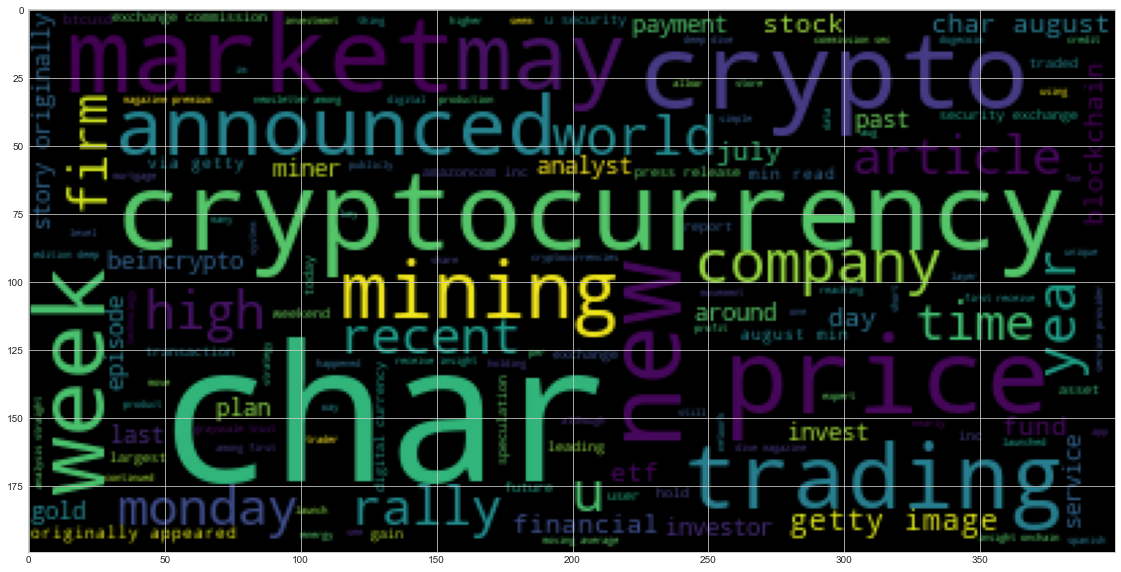

In [37]:
# Generate BTC wordcloud
plt.imshow(btc_cloud)

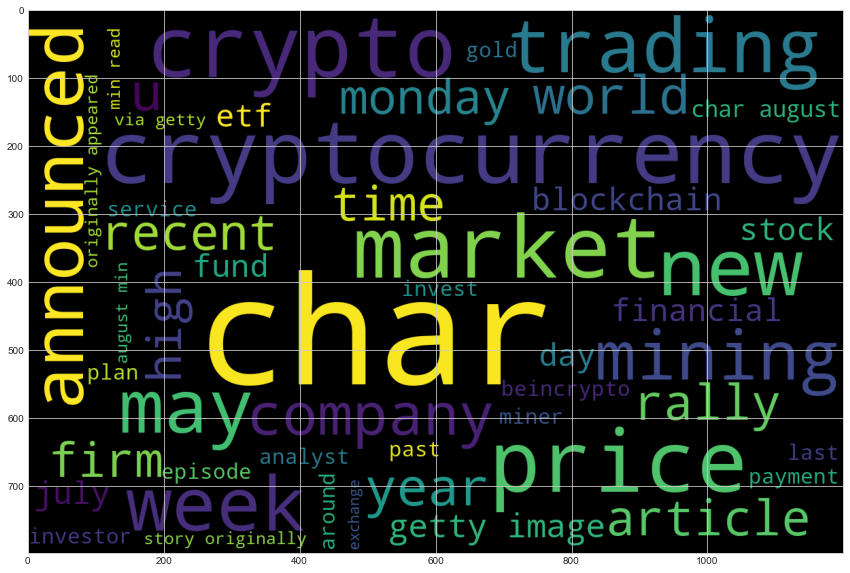

In [38]:
# Generate BTC word cloud with max_words parameter
btc_cloud = WordCloud(width=1200, height=800, max_words=50).generate(cleaned_btc_text)
plt.imshow(btc_cloud)

In [39]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

# def process_text(doc):
cleaned_eth_text = " ".join(tokenizer(eth_df["text"].str.cat()))

In [40]:
# Process text for ETH wordcloud creation
eth_cloud = WordCloud().generate(cleaned_eth_text)

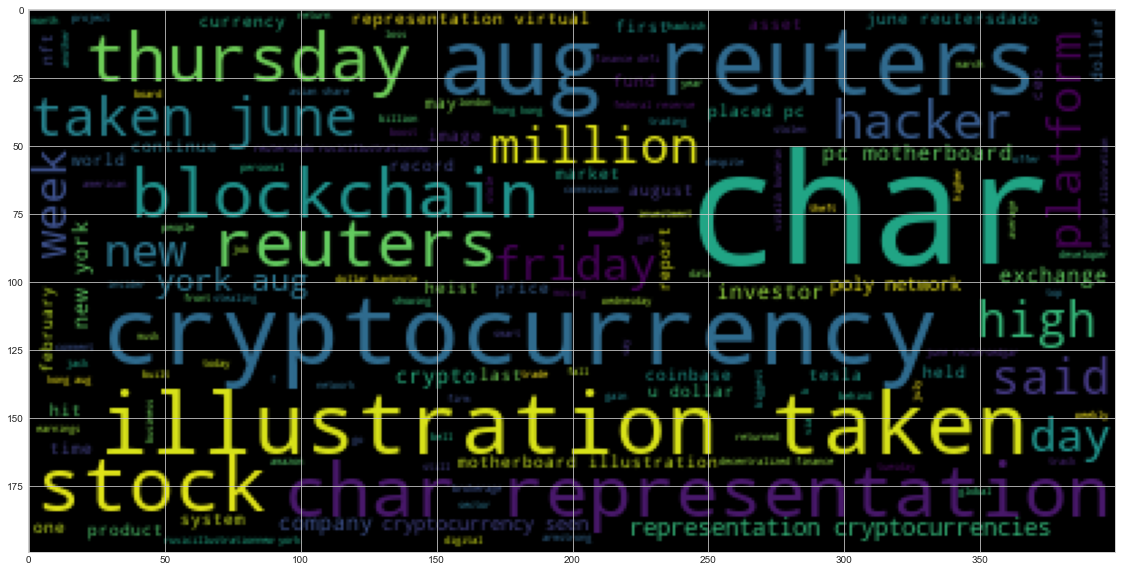

In [41]:
# Generate ETH wordcloud
plt.imshow(eth_cloud)

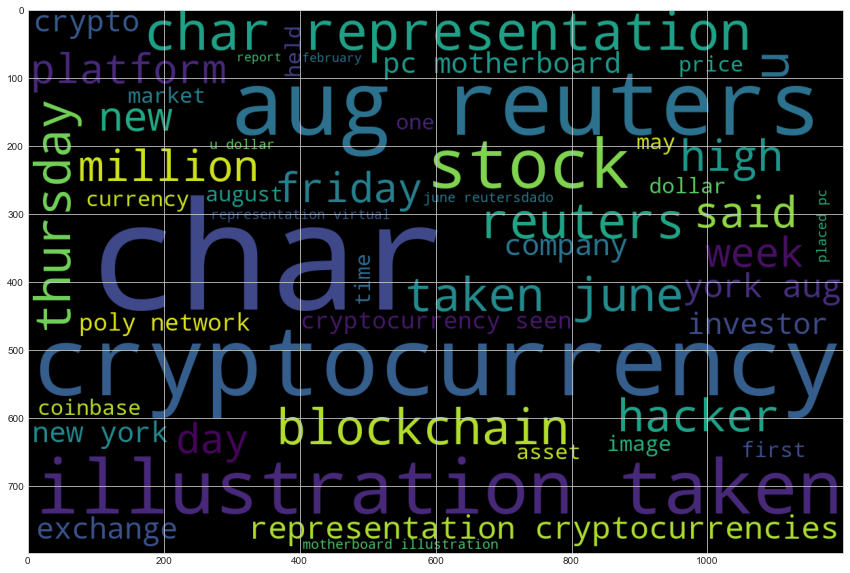

In [42]:
# Generate ETH word cloud with max_words parameter

eth_cloud = WordCloud(width=1200, height=800, max_words=50).generate(cleaned_eth_text)
plt.imshow(eth_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [43]:
# !pip install spacy

# NOTE TO MARKER - Hi, i am getting an error: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'
# multiple attempts to reinstall and fix this has wasted around 3 hours of time

import spacy
from spacy import displacy

In [44]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
# nlp = spacy.load("en_core_web_sm")

In [45]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [83]:
### ***********************************************************************************************
# WEEK 12 / 3/ 04-Ins_NER/Solved/
# ***********************************************************************************************

# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

ner_btc_text = " ".join(tokenizer(btc_df["text"].str.cat()))

In [87]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Set article to be analyzed with spaCy
btc_doc = nlp(ner_btc_text)

In [88]:
# Add a title to the document
# YOUR CODE HERE!



In [89]:
# Render the visualization
# YOUR CODE HERE!

# Render NER visualization with displacy
displacy.render(btc_doc, style='ent')

In [90]:
# List all Entities
# YOUR CODE HERE!

print([ent.text for ent in btc_doc.ents if ent.label_ == 'ORG'])

['u security exchange commission', 'sec', 'amazoncom inc crypto', 'gensler', 'u security exchange commission', 'u security exchange commission', 'sec', 'senate', 'amazoncom inc', 'u variation char stock exchange thailand', 'satoshi portal inc', 'satoshi portal inc', 'cnbc', 'lo char amazoncom inc', 'u united whole mortgage', 'amazoncom inc involvement', 'mara char indian exchange', 'char beincrypto investment management', 'u security exchange commission', 'sec', 'char convenience', 'mellon', 'char cleanspark software']


---

### Ethereum NER

In [62]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

ner_eth_text = " ".join(tokenizer(eth_df["text"].str.cat()))

In [63]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

eth_doc = nlp(ner_eth_text)

# Add a title to the document
# YOUR CODE HERE!

In [64]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(eth_doc, style='ent')

In [81]:
# List all Entities
# YOUR CODE HERE!

print([ent.text for ent in eth_doc.ents if ent.label_ == 'ORG'])

['crypto char cent', 'reuters', 'reuters', 'reuters', 'reuters', 'u security exchange commission', 'american express', 'reuters', 'reuters', 'reuters', 'suillustrationaug reuters', 'reuters', 'washington reuters', 'reuters', 'reuters', 'tesla inc', 'reuters', 'dai', 'netw', 'reuters', 'american express', 'reuters', 'reuters', 'reuters', 'reuters', 'sec', 'deutsche bank', 'reuters', 'u federal reserve', 'reuters', 'reuters', 'reuters', 'reuters', 'federal reserve', 'remark', 'u federal reserve', 'reuters', 'reuters', 'u federal reserve', 'reuters', 'reuters', 'reuters', 'microsoft', 'mellon university', 'new york stock exchange', 'nyse']


---